In [2]:
import re
from collections import defaultdict
from glob import glob
from math import inf
from pprint import pprint

import numpy as np
import matplotlib.pyplot as plt

from src.data import parse_subject

In [3]:
neg_subjects = [
    parse_subject(filename)
    for filename in glob("data/training_t2/TRAINING_DATA/*/neg/*.xml", recursive=True)
]
pos_subjects = [
    parse_subject(filename)
    for filename in glob("data/training_t2/TRAINING_DATA/*/pos/*.xml", recursive=True)
]
all_subjects = neg_subjects + pos_subjects

In [4]:
print("# negative subjects:", len(neg_subjects))
print("# positive subjects:", len(pos_subjects))
print("# total subjects:", len(all_subjects))
print()
print("# negative posts:", sum(len(subject.posts) for subject in neg_subjects))
print("# positive posts:", sum(len(subject.posts) for subject in pos_subjects))
print("# total posts:", sum(len(subject.posts) for subject in all_subjects))
print()
print("# posts without title:", len([post for subject in all_subjects for post in subject.posts if len(post.title) == 0]))
print("# posts without text:", len([post for subject in all_subjects for post in subject.posts if len(post.text) == 0]))
print("# posts without title or text:", len([post for subject in all_subjects for post in subject.posts if len(post.text) == len(post.title) == 0]))

# negative subjects: 1493
# positive subjects: 214
# total subjects: 1707

# negative posts: 986360
# positive posts: 90222
# total posts: 1076582

# posts without title: 734645
# posts without text: 289369
# posts without title or text: 310


Min: 10
Max: 2000
Mean: 630.6865846514353
Median: 366.0


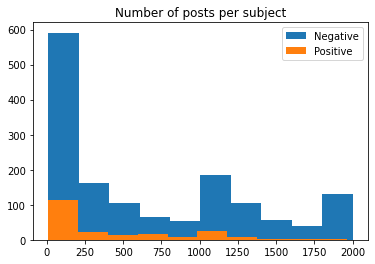

In [10]:
num_neg_posts = [len(subject.posts) for subject in neg_subjects]
num_pos_posts = [len(subject.posts) for subject in pos_subjects]
fig, ax = plt.subplots()
ax.set_title("Number of posts per subject")
ax.hist(num_neg_posts, label="Negative")
ax.hist(num_pos_posts, label="Positive")
ax.legend()
print("Min:", min(num_neg_posts + num_pos_posts))
print("Max:", max(num_neg_posts + num_pos_posts))
print("Mean:", np.mean(num_neg_posts + num_pos_posts))
print("Median:", np.median(num_neg_posts + num_pos_posts))

Min: 0.0
Max: 8177.0
Mean: 31.83975117547938
Median: 13.0


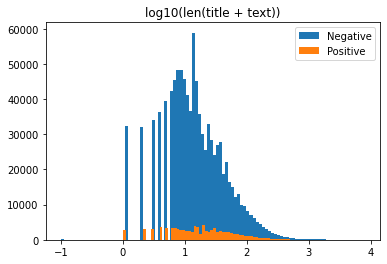

In [11]:
alpha = 0.1
neg_post_lens = [len((post.title + post.text).split()) + alpha for subject in neg_subjects for post in subject.posts]
pos_post_lens = [len((post.title + post.text).split()) + alpha for subject in pos_subjects for post in subject.posts]
fig, ax = plt.subplots()
ax.set_title("log10(len(title + text))")
ax.hist(np.log10(neg_post_lens), bins=100, label="Negative")
ax.hist(np.log10(pos_post_lens), bins=100, label="Positive")
ax.legend()
print("Min:", min(neg_post_lens + pos_post_lens) - alpha)
print("Max:", max(neg_post_lens + pos_post_lens) - alpha)
print("Mean:", np.mean(neg_post_lens + pos_post_lens) - alpha)
print("Median:", np.median(neg_post_lens + pos_post_lens) - alpha)

Shortest post history: 2:47:52
Longest post history: 3953 days, 10:14:55


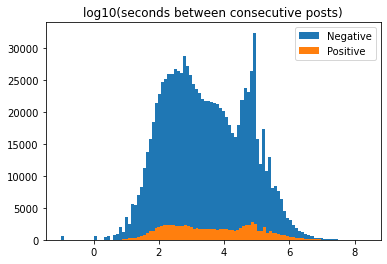

In [7]:
alpha = 0.1
neg_post_intervals = [(post2.date - post1.date).total_seconds() + alpha for subject in neg_subjects for post1, post2 in zip(subject.posts, subject.posts[1:])]
pos_post_intervals = [(post2.date - post1.date).total_seconds() + alpha for subject in pos_subjects for post1, post2 in zip(subject.posts, subject.posts[1:])]
fig, ax = plt.subplots()
ax.set_title("log10(seconds between consecutive posts)")
ax.hist(np.log10(neg_post_intervals), bins=100, label="Negative")
ax.hist(np.log10(pos_post_intervals), bins=100, label="Positive")
ax.legend()
print("Shortest post history:", min(subject.posts[-1].date - subject.posts[0].date for subject in all_subjects))
print("Longest post history:", max(subject.posts[-1].date - subject.posts[0].date for subject in all_subjects))

In [22]:
def word_counts(subjects):
    counts = defaultdict(int)
    for subject in subjects:
        for post in subject.posts:
            for word in re.findall(r"\w+", post.text):
                counts[word] += 1
    return counts

neg_counts = word_counts(neg_subjects)
neg_total = sum(neg_counts.values())
pos_counts = word_counts(pos_subjects)
pos_total = sum(pos_counts.values())
neg_logfreqs = {word: np.log(neg_counts[word] / neg_total) for word in neg_counts if word in pos_counts and neg_counts[word] > 10 and pos_counts[word] > 10}
pos_logfreqs = {word: np.log(pos_counts[word] / pos_total) for word in pos_counts if word in neg_counts and neg_counts[word] > 10 and pos_counts[word] > 10}
neg_most_relevant = sorted(neg_logfreqs, key=lambda word: neg_logfreqs[word] - pos_logfreqs[word], reverse=True)[:50]
pos_most_relevant = sorted(pos_logfreqs, key=lambda word: pos_logfreqs[word] - neg_logfreqs[word], reverse=True)[:50]
print("Negative words:")
pprint([(word, neg_counts[word]) for word in neg_most_relevant])
print("Positive words:")
pprint([(word, pos_counts[word]) for word in pos_most_relevant])

Negative words:
[('3A', 3662),
 ('submission', 4757),
 ('peer', 1767),
 ('Israel', 1797),
 ('Republican', 1795),
 ('warming', 1320),
 ('domain', 1268),
 ('Congress', 1468),
 ('moderators', 1780),
 ('climate', 3208),
 ('Director', 1607),
 ('steamcommunity', 1264),
 ('al', 1321),
 ('Iraq', 1315),
 ('Bush', 1313),
 ('Clinton', 2360),
 ('FBI', 1168),
 ('Democrats', 1617),
 ('author', 4238),
 ('global', 2217),
 ('goo', 1276),
 ('GOP', 1636),
 ('hail', 926),
 ('Rule', 1070),
 ('Trump', 11674),
 ('carbon', 1283),
 ('ISIS', 1040),
 ('pdf', 1842),
 ('democracy', 799),
 ('journal', 2166),
 ('immigration', 767),
 ('Muslims', 1199),
 ('Russia', 3194),
 ('000', 14868),
 ('np', 707),
 ('documents', 835),
 ('q', 3565),
 ('trump', 1572),
 ('President', 2861),
 ('Id', 2019),
 ('conspiracy', 1457),
 ('ca', 905),
 ('nbsp', 1506),
 ('revenue', 662),
 ('solar', 1022),
 ('la', 2764),
 ('de', 5935),
 ('voters', 1314),
 ('Washington', 1186),
 ('election', 3014)]
Positive words:
[('Lyrics', 97),
 ('asexuality'